## Project: Querying and Filtering Pokemon data
<center>
<img src="cover.jpg" >

</center>  

In [3]:


from IPython.core.pylabtools import figsize
# This is how you can make a file downloadable
from IPython.display import FileLink

# Create download links for the files
print("Download CSV:")
display(FileLink("pokemon.csv"))

print("Download Image:")
display(FileLink("cover.jpg"))
 

Download CSV:


/home/aldo/DS_PROJECTS/2. Pokemon/pokemon.csv

Download Image:


/home/aldo/DS_PROJECTS/2. Pokemon/cover.jpg

## Task 0 - Setup

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
717,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           721 non-null    int64 
 1   Name        721 non-null    object
 2   Type 1      721 non-null    object
 3   Type 2      359 non-null    object
 4   Total       721 non-null    int64 
 5   HP          721 non-null    int64 
 6   Attack      721 non-null    int64 
 7   Defense     721 non-null    int64 
 8   Sp. Atk     721 non-null    int64 
 9   Sp. Def     721 non-null    int64 
 10  Speed       721 non-null    int64 
 11  Generation  721 non-null    int64 
 12  Legendary   721 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 68.4+ KB


In [7]:
missing_count = df.isnull().sum()  # Total missing values in each column
print(missing_count)

#               0
Name            0
Type 1          0
Type 2        362
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


### Distribution of pokemon types

<Axes: ylabel='count'>

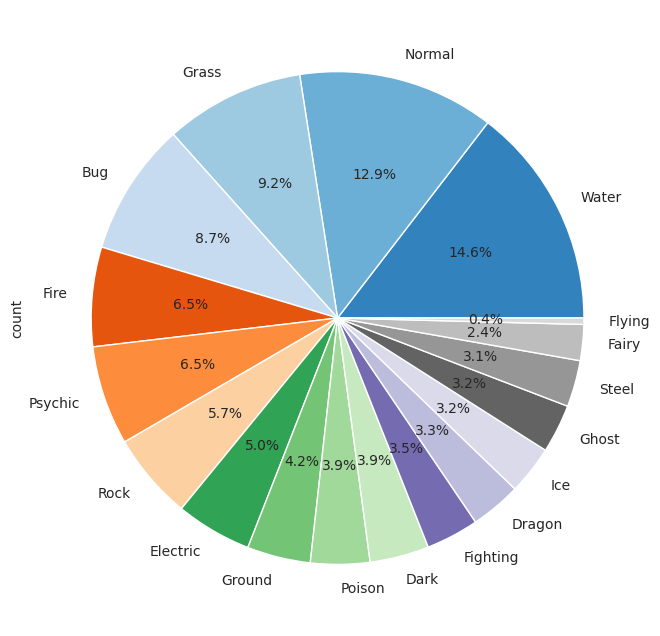

In [8]:
df['Type 1'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='tab20c', figsize=(10, 8))

### Distribution of Pokemon Totals:

<Axes: ylabel='Frequency'>

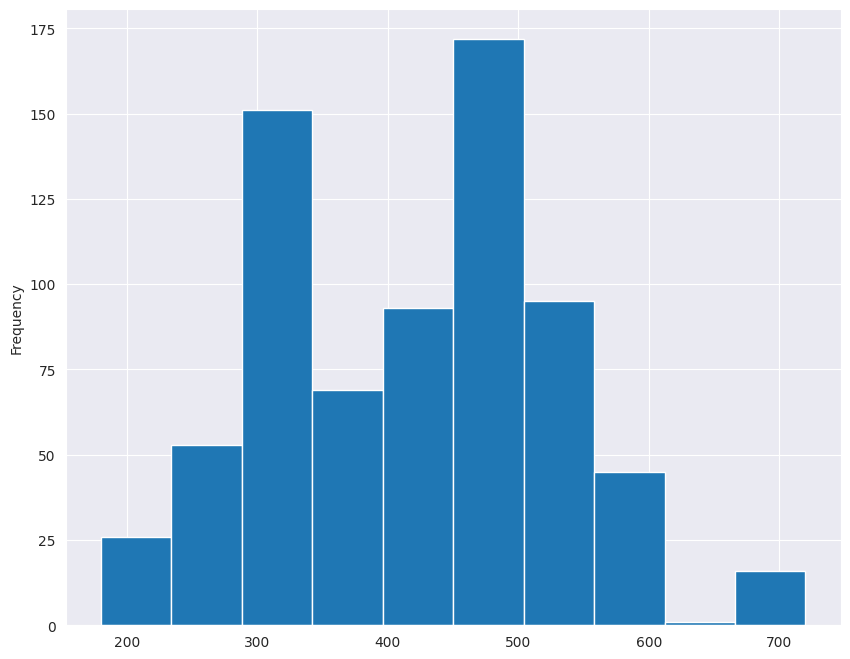

In [9]:
df['Total'].plot(kind='hist', figsize=(10, 8))

<Axes: >

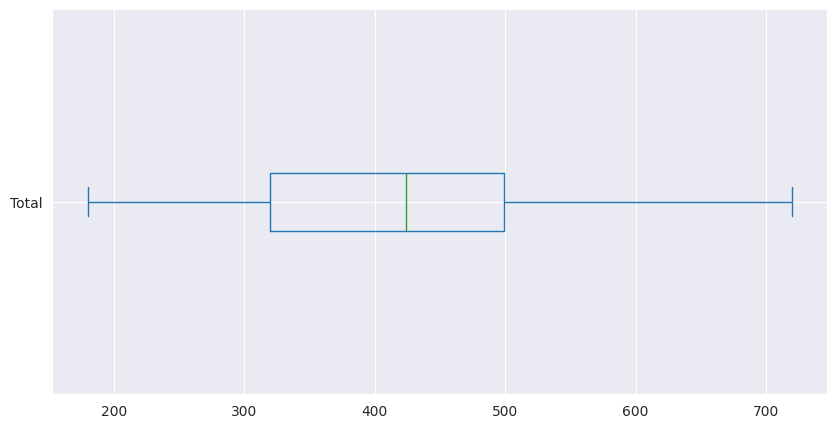

In [10]:
df['Total'].plot(kind='box', vert=False, figsize=(10, 5))

### Distribution of Legendary Pokemons:

<Axes: ylabel='count'>

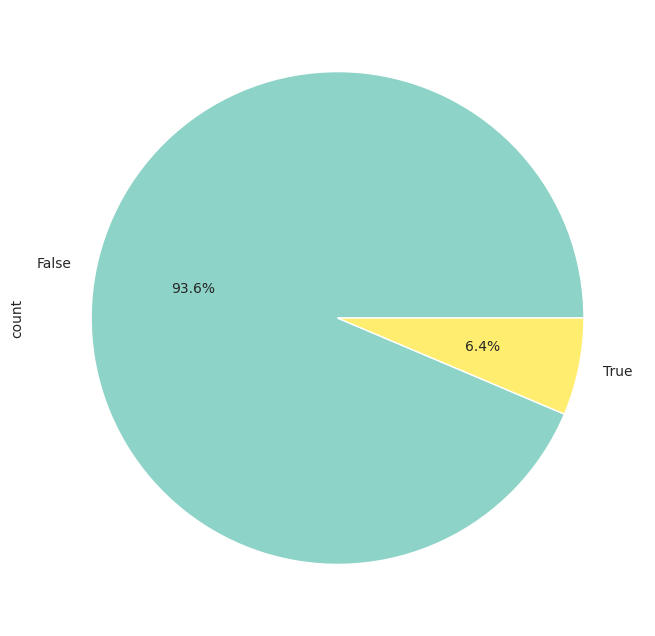

In [11]:
df['Legendary'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set3', figsize=(10, 8))

## Basic filtering

### 1. How many Pokemons exist with an `Attack` value greater than 150?

Doing a little bit of visual exploration, we can have a sense of the most "powerful" pokemons (defined by their "Attack" feature). A boxplot is a great way to visualize this:

<Axes: xlabel='Attack'>

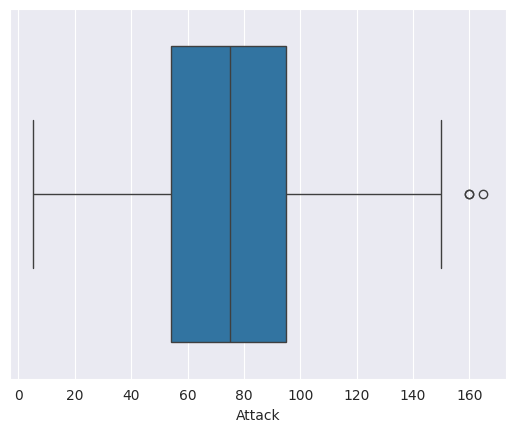

In [12]:
sns.boxplot(data=df, x='Attack')

In [13]:
df.loc[df["Attack"]>150]


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
288,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
408,409,Rampardos,Rock,NaN,495,97,165,60,65,50,58,4,False
485,486,Regigigas,Normal,NaN,670,110,160,110,80,110,100,4,True


In [14]:
(df["Attack"]>150).sum()

np.int64(3)

In [15]:
df.query("Attack >150")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
288,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
408,409,Rampardos,Rock,NaN,495,97,165,60,65,50,58,4,False
485,486,Regigigas,Normal,NaN,670,110,160,110,80,110,100,4,True


### 2. Select all the pokemons with a speed of 10 or less

<Axes: xlabel='Speed'>

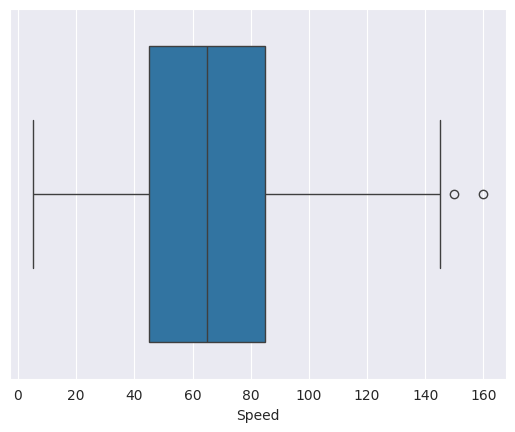

In [16]:
sns.boxplot(data=df, x="Speed")

In [17]:
df.loc[df["Speed"]<=10]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
212,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
327,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
437,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
445,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
596,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False


In [18]:
slow_pokemons = df.loc[df["Speed"]<=10]
slow_pokemons

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
212,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
327,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
437,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
445,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
596,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False


### 3. How many pokemons have a Sp. Def value of 25 or less?

In [19]:
(df["Sp. Def"]<=25).sum()

np.int64(17)

In [20]:
df.loc[df["Sp. Def"]<=25]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
10,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False
12,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
13,14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False
38,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
89,90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False
97,98,Krabby,Water,NaN,325,30,105,90,25,25,50,1,False
115,116,Horsea,Water,NaN,295,30,40,70,70,25,60,1,False
128,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
173,174,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False


## 4. Select all the legendary pokemons

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           721 non-null    int64 
 1   Name        721 non-null    object
 2   Type 1      721 non-null    object
 3   Type 2      359 non-null    object
 4   Total       721 non-null    int64 
 5   HP          721 non-null    int64 
 6   Attack      721 non-null    int64 
 7   Defense     721 non-null    int64 
 8   Sp. Atk     721 non-null    int64 
 9   Sp. Def     721 non-null    int64 
 10  Speed       721 non-null    int64 
 11  Generation  721 non-null    int64 
 12  Legendary   721 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 68.4+ KB


In [22]:
df.loc[df["Legendary"]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
143,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
144,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
145,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
149,150,Mewtwo,Psychic,Fighting,680,106,110,90,154,90,130,1,True
242,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
243,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
244,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
248,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
249,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
376,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True


### 5. Find the outlier
Find the pokemon that is clearly an outlier in terms of Attack / Defense:
Take a look at the scatterplot that correlates pokemons Attack and Defense. What's the Name of the pokemon that is a clear outlier (strong Defense, but very low Attack).

Text(150, 10, "Who's this guy?")

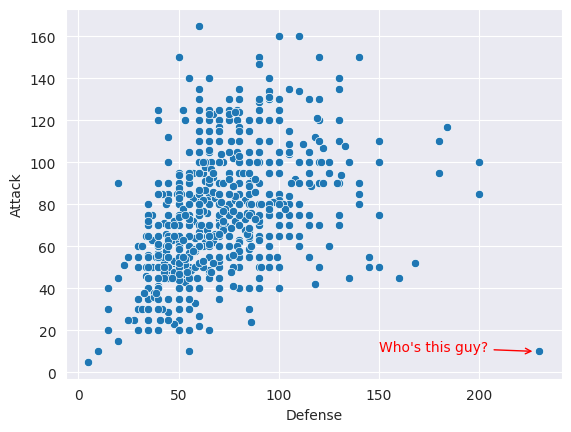

In [23]:
ax = sns.scatterplot(data=df, x="Defense", y="Attack")
ax.annotate(
    "Who's this guy?", xy=(228, 10), xytext=(150, 10), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)

In [24]:
df.sort_values(by=['Defense',"Attack"], ascending=[False,True])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
212,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
207,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
376,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
712,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
90,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,238,Smoochum,Ice,Psychic,305,45,30,15,85,65,65,2,False
171,172,Pichu,Electric,NaN,205,20,40,15,35,35,60,2,False
241,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
112,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False


## Advanced selection

### 6. How many pokemons are of Type 1 Fire and Type 2 Flying?

In [25]:
((df["Type 1"]=="Fire")  & (df["Type 2"]=="Flying")).sum()

np.int64(5)

In [26]:
df.loc[(df["Type 1"]=="Fire")  & (df["Type 2"]=="Flying")]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
145,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
249,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
661,662,Fletchinder,Fire,Flying,382,62,73,55,56,52,84,6,False
662,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False


### 7. How many 'Poison' pokemons are across both types?
How many pokemons exist that are of type Poison in either Type 1 or Type 2?

In [27]:
(df["Type 1"]=="Poison").value_counts()

Type 1
False    693
True      28
Name: count, dtype: int64

In [28]:
(df["Type 2"] == "Poison").value_counts()

Type 2
False    690
True      31
Name: count, dtype: int64

In [29]:
(df["Type 1"]=="Poison")

0      False
1      False
2      False
3      False
4      False
       ...  
716    False
717    False
718    False
719    False
720    False
Name: Type 1, Length: 721, dtype: bool

In [30]:
df.loc[(df["Type 1"]=="Poison")|(df["Type 2"]=="Poison")]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
12,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
13,14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False
14,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False
22,23,Ekans,Poison,NaN,288,35,60,44,40,54,55,1,False
23,24,Arbok,Poison,NaN,438,60,85,69,65,79,80,1,False
28,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False
29,30,Nidorina,Poison,NaN,365,70,62,67,55,55,56,1,False


### 8. What pokemon of Type 1 Ice has the strongest defense?

In [40]:
df.loc[df["Type 1"]=="Ice", "Defense"].max()

np.int64(184)

In [43]:
df.loc[
    (df["Type 1"]=="Ice")&(df["Defense"]==df.loc[df["Type 1"]=="Ice", "Defense"].max())
]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
712,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [41]:
df.loc[df["Type 1"]=="Ice"].sort_values(by=["Defense"], ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
712,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
470,471,Glaceon,Ice,NaN,525,65,60,110,130,95,65,4,False
143,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
377,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
364,365,Walrein,Ice,Water,530,110,80,90,95,90,65,3,False
711,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
583,584,Vanilluxe,Ice,NaN,535,71,95,85,110,95,79,5,False
613,614,Beartic,Ice,NaN,485,95,110,80,70,80,50,5,False
220,221,Piloswine,Ice,Ground,450,100,100,80,60,60,50,2,False
472,473,Mamoswine,Ice,Ground,530,110,130,80,70,60,80,4,False


### What's the most common `Type 1` of legendary pokemons?

In [48]:
df.loc[df["Legendary"],"Type 1"].value_counts()

Type 1
Psychic     8
Dragon      7
Fire        5
Steel       4
Water       3
Rock        3
Electric    3
Ice         2
Ground      2
Normal      2
Dark        2
Grass       2
Ghost       1
Flying      1
Fairy       1
Name: count, dtype: int64

<Axes: xlabel='Type 1'>

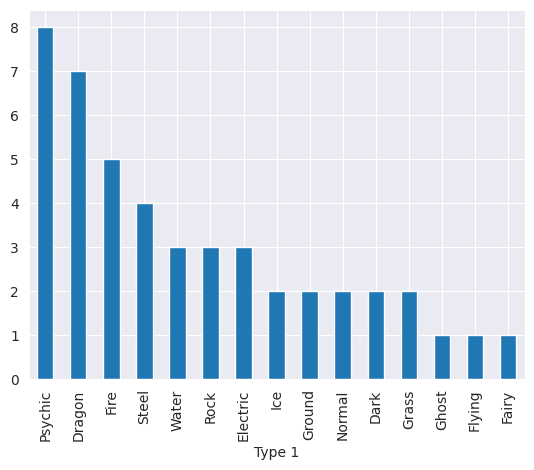

In [50]:
df.loc[df["Legendary"], "Type 1"].value_counts().plot(kind="bar")

### What is the most powerful pokemon from the first 3 generations of type water?
`Total` column will give you the most powerful pokemon

Generation
5    156
1    151
3    135
4    107
2    100
6     72
Name: count, dtype: int64